In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Dowloading dataset**

In [2]:
!kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

 86% 47.0M/54.4M [00:00<00:00, 158MB/s] 
100% 54.4M/54.4M [00:00<00:00, 153MB/s]


**Extracting zip file**

In [3]:
import zipfile
file=zipfile.ZipFile('/content/sentiment-analysis-dataset.zip','r')
file.extractall()

**Importing LIbraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [5]:
train_ds = pd.read_csv('train.csv', encoding='latin-1')
test_ds = pd.read_csv('test.csv', encoding='latin-1')


In [6]:
len(train_ds)

27481

In [7]:
train_ds.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [8]:
test_ds.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


**Dropping unnecessary columns**

In [9]:
train_ds=train_ds[['selected_text','sentiment']]
test_ds=test_ds[['text','sentiment']]

In [10]:
train_ds

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
...,...,...
27476,d lost,negative
27477,", don`t force",negative
27478,Yay good for both of you.,positive
27479,But it was worth it ****.,positive


**Droping Duplicate rows**

In [11]:
train_ds.duplicated().sum()
train_ds.drop_duplicates(inplace=True)

<ipython-input-11-f7cf95027212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds.drop_duplicates(inplace=True)


In [12]:
test_ds.duplicated().sum()
test_ds.drop_duplicates(inplace=True)

<ipython-input-12-40da4d2ef1b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds.drop_duplicates(inplace=True)


**Dropping rows with NULL values**

In [13]:
train_ds.dropna(inplace=True)
test_ds.dropna(inplace=True)

<ipython-input-13-cc736b2e4fee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds.dropna(inplace=True)
<ipython-input-13-cc736b2e4fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds.dropna(inplace=True)


**Downloding spacy en_core_web_lg for word embeddings**

In [14]:
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load("en_core_web_lg")


2023-11-15 04:22:40.072171: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 04:22:40.072227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 04:22:40.072261: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 04:22:40.079591: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 04:22:41.163917: W tensorflow/compiler/

**Preprocessing text**

In [15]:

def preprocess(text) :
  text=text.lower()
  text=re.sub(r'[^0-9a-z\s\n]','',text)
  doc=nlp(text)
  filtered_tokens=[]
  for token in doc :
    if token.is_stop or token.is_punct :
      continue
    else :
       filtered_tokens.append(token.lemma_)
  return '  '.join(filtered_tokens)


In [16]:
nlp.vocab['not'].is_stop=False

train_ds['selected_text']=train_ds['selected_text'].apply(preprocess)
test_ds['text']=test_ds['text'].apply(preprocess)

In [17]:
train_ds.head()

,selected_text,sentiment
0,d respond go,neutral
1,sooo sad,negative
2,bully,negative
3,leave,negative
4,son,negative


In [18]:
test_ds.head()

,text,sentiment
0,session day httptwitpiccom67ezh,neutral
1,shanghai exciting precisely skyscrape...,positive
2,recession hit veronique branquinho quit c...,negative
3,happy bday,positive
4,httptwitpiccom4w75p like,positive


<Axes: >

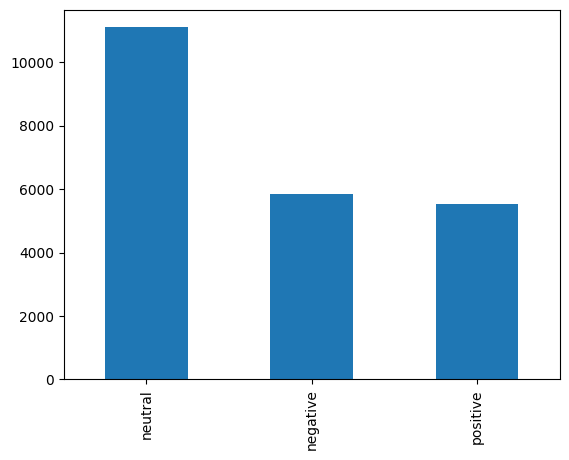

In [19]:
train_ds.sentiment.value_counts().plot(kind='bar')

In [20]:
train_ds['sentiment']=train_ds['sentiment'].replace({'negative':0,'neutral':1,'positive':2})

In [21]:
test_ds['sentiment']=test_ds['sentiment'].replace({'negative':0,'neutral':1,'positive':2})

**Checking for imbalance**

In [22]:
test_ds['sentiment'].value_counts()

1    1430
2    1103
0    1001
Name: sentiment, dtype: int64

**under sampling train data set**

In [23]:
df_class0=train_ds[train_ds['sentiment']==0]
df_class1=train_ds[train_ds['sentiment']==1]
df_class2=train_ds[train_ds['sentiment']==2]

In [24]:
len0=len(df_class0)
len1=len(df_class1)
len2=len(df_class2)

In [25]:
minimum=min(len0,len1,len2)

In [26]:
df_class0_under=df_class0.sample(minimum)
df_class1_under=df_class1.sample(minimum)
df_class2_under=df_class2.sample(minimum)

In [27]:
print(len(df_class0_under),len(df_class1_under),len(df_class2_under))

5519 5519 5519


In [28]:
train_ds_under=pd.concat([df_class0_under,df_class1_under,df_class2_under],axis=0)

In [29]:
train_ds_under.head(5)

,selected_text,sentiment
7511,sober,0
5512,s problem,0
20185,not want go,0
16775,tired,0
6431,annoy,0


In [30]:
train_ds_under=train_ds_under.sample(frac=1,random_state=42)

In [31]:
train_ds_under.head(20)

,selected_text,sentiment
17703,lame,0
8539,suck bad,0
3551,gutte,0
22950,d 2 late,0
510,yeah m go to ur picture ipod baby,1
23731,short stack need add short stack,1
16761,m chillin,2
2777,man suck,0
16400,ouch,0
19189,cool question,2


**Converting text to word vectors**

In [32]:
def cnvt2wordvectors(text):
  return nlp(text).vector

In [33]:
train_ds_under['selected_text']=train_ds_under['selected_text'].apply(cnvt2wordvectors)
test_ds['text']=test_ds['text'].apply(cnvt2wordvectors)

In [34]:
train_ds_under.head(5)

,selected_text,sentiment
17703,"[0.2229, 2.0296, 2.6551, 1.6775, -0.95451, 2.2...",0
8539,"[0.37280002, -0.5751233, -1.0874333, -0.829483...",0
3551,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
22950,"[-0.73346007, -3.37924, 1.8899502, 1.8048799, ...",0
510,"[0.31129667, 2.171268, -2.0104735, -1.4122653,...",1


In [39]:
x=train_ds_under['selected_text'].values
y=train_ds_under['sentiment']

array([array([ 2.2290e-01,  2.0296e+00,  2.6551e+00,  1.6775e+00, -9.5451e-01,
               2.2841e+00,  2.1080e+00,  9.1223e-01, -2.0260e+00, -1.6780e+00,
              -3.9700e-01,  1.0184e+00,  2.2480e+00,  4.8616e-01,  1.0423e-01,
              -1.3133e+00,  1.1916e-01, -2.0471e+00, -2.5071e+00,  2.7997e-01,
               8.5366e-01, -1.5982e-01,  2.3700e-01, -3.7882e+00,  2.4214e+00,
              -1.7974e+00,  4.9360e-01,  1.6237e+00,  1.1676e+00,  5.0360e+00,
              -2.8203e+00,  1.1245e-02,  4.9663e-02,  3.0935e+00, -1.6594e+00,
              -4.7953e-01, -5.2881e+00, -1.8721e+00,  4.4064e+00,  1.2460e+00,
              -2.8932e+00, -4.7366e+00, -2.2840e-01, -2.5723e+00, -1.5249e+00,
              -2.4546e-01,  1.0126e+00, -4.0584e+00, -5.2929e+00,  2.8300e+00,
               1.3849e-01,  1.9847e+00,  4.5644e+00,  2.1820e+00, -1.1312e+00,
               1.9551e+00,  2.1291e+00,  9.0553e-01,  7.3609e-01,  6.0289e-01,
               2.9027e+00, -3.4651e+00,  4.8184e+00,

In [41]:
x=np.stack(x)

In [43]:
x.shape

(16557, 300)

In [44]:
x_test=test_ds['text'].values
y_test=test_ds['sentiment']
x_test=np.stack(x_test)

**Normalizing input features**

In [45]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(x)
scaled_test_embed = scaler.transform(x_test)


In [47]:
scaled_train_embed

array([[0.4555007 , 0.760546  , 0.71129453, ..., 0.5905771 , 0.5356437 ,
        0.48011962],
       [0.46296206, 0.6667774 , 0.504423  , ..., 0.59805435, 0.66674286,
        0.47933006],
       [0.44440573, 0.6874815 , 0.56453174, ..., 0.47210225, 0.64006037,
        0.44501588],
       ...,
       [0.44199336, 0.6834163 , 0.56993884, ..., 0.52264637, 0.6432692 ,
        0.42979476],
       [0.45213634, 0.7253672 , 0.5365429 , ..., 0.49862632, 0.6273862 ,
        0.4932449 ],
       [0.58426994, 0.59257257, 0.55686057, ..., 0.402648  , 0.4349342 ,
        0.534138  ]], dtype=float32)

In [48]:
scaled_test_embed

array([[0.45869157, 0.702745  , 0.55293596, ..., 0.41635475, 0.62298095,
        0.4356083 ],
       [0.44581154, 0.678755  , 0.538441  , ..., 0.4867972 , 0.60926825,
        0.45745933],
       [0.44045997, 0.68953323, 0.5111975 , ..., 0.5156027 , 0.63678473,
        0.48666888],
       ...,
       [0.45407206, 0.71328837, 0.4920239 , ..., 0.50269073, 0.5700911 ,
        0.47260955],
       [0.4675075 , 0.7508825 , 0.45183298, ..., 0.48786372, 0.51632893,
        0.42747203],
       [0.46740243, 0.7013379 , 0.5116314 , ..., 0.45808432, 0.60495085,
        0.42580935]], dtype=float32)

**Model building**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [52]:
test={
    'logistic_regression' : {
        'model' : LogisticRegression(max_iter=5000),
        'params' : {
            'C':[1,3,5]
        }
    },
    'svc' : {
        'model' : SVC(gamma="auto"),
        'params' : {
            'C':[1,5,10],
            'kernel' :['rbf','poly']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(criterion='gini'),
        'params' : {
            'n_estimators':[50,80,100,125],
        }
    },
    'gaussianNB' : {
        'model' : GaussianNB(),
        'params' : {
        }
    },
    'MultinomialNB' : {
        'model' : MultinomialNB(),
        'params' : {
        }
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(criterion='entropy',
    splitter='best'
),
        'params' : {
        }
    },
    'Xgboost_classifier' :
    {
        'model' : XGBClassifier(),
        'params' : {
        }

    }
}

In [55]:
from sklearn.model_selection import GridSearchCV
ans=[]
for name,md in test.items() :
    obj=GridSearchCV(md['model'],md['params'],cv=5)
    obj.fit(scaled_train_embed,y)
    temp={}
    temp['name']=name
    temp['best_params']=obj.best_params_
    temp['best_score']=obj.best_score_
    ans.append(temp)

In [56]:
pd.DataFrame(ans)

,name,best_params,best_score
0,logistic_regression,{'C': 1},0.749169
1,svc,"{'C': 10, 'kernel': 'rbf'}",0.735821
2,random_forest,{'n_estimators': 125},0.750860
3,gaussianNB,{},0.570936
4,MultinomialNB,{},0.661653
5,DecisionTreeClassifier,{},0.625476
6,Xgboost_classifier,{},0.765295


In [57]:
xgboost=XGBClassifier()
xgboost.fit(scaled_train_embed,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
xgboost.score(scaled_test_embed,y_test)

0.5509337860780985

In [60]:
logistic=LogisticRegression(C=1,max_iter=5000)
logistic.fit(scaled_train_embed,y)
logistic.score(scaled_test_embed,y_test)

0.6078098471986417

In [61]:
random=RandomForestClassifier(n_estimators=125)
random.fit(scaled_train_embed,y)
random.score(scaled_test_embed,y_test)

0.49830220713073003

In [102]:
y_pred=logistic.predict(scaled_test_embed)

**Evaluating model with other metrics**

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.71      0.43      0.54      1001
           1       0.52      0.84      0.64      1430
           2       0.81      0.47      0.60      1103

    accuracy                           0.61      3534
   macro avg       0.68      0.58      0.59      3534
weighted avg       0.67      0.61      0.60      3534



[[ 431  549   21]
 [ 135 1195  100]
 [  42  539  522]]


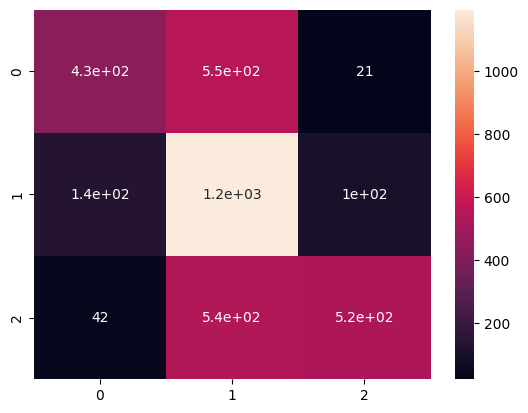

In [109]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [63]:
import joblib
joblib.dump(logistic ,'model.pkl')

['model.pkl']

**Building ANN**

In [65]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import Dropout,Dense
from keras import Sequential

In [96]:
model=Sequential()
model.add(Dense(150,activation='relu',input_shape=(300,)))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))




In [97]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 150)               45150     
                                                                 
 dropout_18 (Dropout)        (None, 150)               0         
                                                                 
 dense_35 (Dense)            (None, 100)               15100     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 3)                 153       
                                                                 
Total params: 65453 (255.68 KB)
Trainable params: 6545

In [98]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [99]:
 history=model.fit(scaled_train_embed,y,epochs=10)

Epoch 1/10
518/518 [==============================] - 3s 3ms/step - loss: 1.0643 - accuracy: 0.4128
Epoch 2/10
518/518 [==============================] - 2s 3ms/step - loss: 0.8920 - accuracy: 0.5790
Epoch 3/10
518/518 [==============================] - 2s 4ms/step - loss: 0.8452 - accuracy: 0.6166
Epoch 4/10
518/518 [==============================] - 3s 5ms/step - loss: 0.8242 - accuracy: 0.6344
Epoch 5/10
518/518 [==============================] - 2s 3ms/step - loss: 0.8337 - accuracy: 0.6220
Epoch 6/10
518/518 [==============================] - 2s 3ms/step - loss: 0.8086 - accuracy: 0.6508
Epoch 7/10
518/518 [==============================] - 2s 4ms/step - loss: 0.7810 - accuracy: 0.6665
Epoch 8/10
518/518 [==============================] - 2s 3ms/step - loss: 0.7914 - accuracy: 0.6566
Epoch 9/10
518/518 [==============================] - 2s 3ms/step - loss: 0.7696 - accuracy: 0.6715
Epoch 10/10
518/518 [==============================] - 2s 4ms/step - loss: 0.7649 - accuracy: 0.6743

In [100]:
 history=model.fit(scaled_train_embed,y,epochs=100,initial_epoch=history.epoch[-1])

Epoch 10/100
518/518 [==============================] - 2s 4ms/step - loss: 0.7672 - accuracy: 0.6710
Epoch 11/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7701 - accuracy: 0.6727
Epoch 12/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7801 - accuracy: 0.6655
Epoch 13/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7646 - accuracy: 0.6743
Epoch 14/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7537 - accuracy: 0.6807
Epoch 15/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7828 - accuracy: 0.6639
Epoch 16/100
518/518 [==============================] - 2s 4ms/step - loss: 0.7546 - accuracy: 0.6819
Epoch 17/100
518/518 [==============================] - 2s 4ms/step - loss: 0.7355 - accuracy: 0.6957
Epoch 18/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7453 - accuracy: 0.6859
Epoch 19/100
518/518 [==============================] - 2s 3ms/step - loss: 0.7402

In [101]:
model.evaluate(scaled_test_embed,y_test)

111/111 [==============================] - 1s 6ms/step - loss: 0.9460 - accuracy: 0.5195


[0.9459628462791443, 0.5195246338844299]